In [1]:
import pandas as pd
import os
import statistics
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [2]:
files = []
i=0
for root, dirs, filenames in os.walk(os.curdir):
    for file in filenames:
        if file.endswith('.csv'):
            files.append(os.path.join(root, file))

# Reviso que las columnas estén bien
for file in files:
    with open(file, 'r') as f:
        header = f.readline().strip()
    columns = header.split(',')    
    if len(columns) < 13:
        header += ',A,B'

        with open(file, 'r') as f:
            lines = f.readlines()[1:]  # Omitir el encabezado original

        # Sobrescribir el archivo con el nuevo encabezado y el resto del contenido
        with open(file, 'w') as f:
            f.write(header + '\n')  # Escribe el nuevo encabezado
            f.writelines(lines)  # Escribe las líneas originales sin cambios

In [3]:
# Lee todos los archivos CSV en un diccionario de DataFrames
dataframes = {file: pd.read_csv(file) for file in files}

In [4]:
dataframes = []
for root, dirs, filenames in os.walk(os.getcwd()):
    for file in filenames:
        if file.endswith('.csv'):
            filepath = os.path.join(root, file)
            df = pd.read_csv(filepath)

            # Verificar si el DataFrame tiene al menos 12 columnas (índice 11)
            if df.shape[1] > 11:
                # Verificar si la columna 12 (índice 11) se llama 'A'
                if df.columns[11] != 'A':
                    # Renombrar la columna en el índice 11 a 'A'
                    df.columns.values[11] = 'A'
                if df.columns[12] != 'B':
                    # Renombrar la columna en el índice 11 a 'A'
                    df.columns.values[12] = 'B'

            dataframes.append(df)

# Concatenar todos los DataFrames en uno solo
combined_df = pd.concat(dataframes, ignore_index=True)

# Imprimir el resultado final para verificar
df = combined_df

In [5]:
# Filtrar las filas donde 'subid' empieza con 'C'
df_C = df[df['subid'].str.startswith('C')]

# Filtrar las filas donde 'subid' empieza con 'N'
df_N = df[df['subid'].str.startswith('N')]

# Ahora tienes dos DataFrames: uno con valores que empiezan con 'C' y otro con 'N'
print("DataFrame con subid que empiezan con 'C':")
print(df_C.head())

print("\nDataFrame con subid que empiezan con 'N':")
print(df_N.head())

DataFrame con subid que empiezan con 'C':
    subid  etapa  ntrial estim  correct  response_time  \
150  C029      1       1    r6        1            NaN   
151  C029      1       2    g8        1            NaN   
152  C029      1       3    r7        1            NaN   
153  C029      1       4    r4        1           0.45   
154  C029      1       5    r6        1            NaN   

     cumulative_response_time  fixation_onset  fixation_dur  stim_onset  \
150                       NaN               0            12          15   
151                       NaN               0            12          15   
152                       NaN               0            12          15   
153                     3.701               0            12          15   
154                       NaN               0            12          15   

     stim_dur   A    B  
150        39  55   50  
151        46  62   50  
152        64  80   50  
153        47  63  100  
154        48  64   50  

DataFra

In [6]:
df_C1 = df_C[df_C['etapa']==1]
df_C2 = df_C[df_C['etapa']==2]
df_C3 = df_C[df_C['etapa']==3]
df_N1 = df_N[df_N['etapa']==1]
df_N2 = df_N[df_N['etapa']==2]
df_N3 = df_N[df_N['etapa']==3]

In [8]:
# rt es response time, pr es promediado

rt_df_C1 = df_C1['response_time'].dropna()
pr_rt_df_C1 = rt_df_C1.mean()

rt_df_C2 = df_C2['response_time'].dropna()
pr_rt_df_C2 = rt_df_C2.mean()

rt_df_C3 = df_C3['response_time'].dropna()
pr_rt_df_C3 = rt_df_C3.mean()

rt_df_N1 = df_N1['response_time'].dropna()
pr_rt_df_N1 = rt_df_N1.mean()

rt_df_N2 = df_N2['response_time'].dropna()
pr_rt_df_N2 = rt_df_N2.mean()

rt_df_N3 = df_N3['response_time'].dropna()
pr_rt_df_N3 = rt_df_N3.mean()

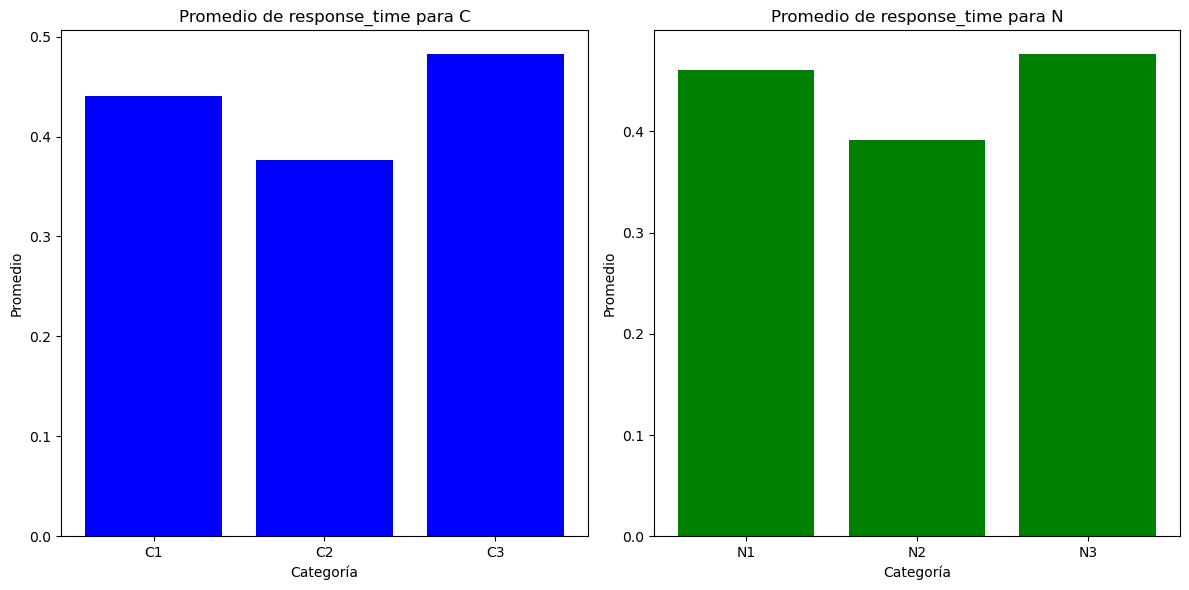

In [9]:
categories_C = ['C1', 'C2', 'C3']
values_C = [pr_rt_df_C1, pr_rt_df_C2, pr_rt_df_C3]

categories_N = ['N1', 'N2', 'N3']
values_N = [pr_rt_df_N1, pr_rt_df_N2, pr_rt_df_N3]

# Crear gráfico de barras para C
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.bar(categories_C, values_C, color='blue')
plt.title('Promedio de response_time para C')
plt.xlabel('Categoría')
plt.ylabel('Promedio')

# Crear gráfico de barras para N
plt.subplot(1, 2, 2)
plt.bar(categories_N, values_N, color='green')
plt.title('Promedio de response_time para N')
plt.xlabel('Categoría')
plt.ylabel('Promedio')

# Mostrar los gráficos
plt.tight_layout()
plt.show()


In [10]:
pr_correct_df_C1 = df_C1['correct'].mean()
pr_correct_df_C2 = df_C2['correct'].mean()
pr_correct_df_C3 = df_C3['correct'].mean()
pr_correct_df_N1 = df_N1['correct'].mean()
pr_correct_df_N2 = df_N2['correct'].mean()
pr_correct_df_N3 = df_N3['correct'].mean()

In [11]:
print(f"C1: {pr_correct_df_C1 * 100:.2f}%")
print(f"C2: {pr_correct_df_C2 * 100:.2f}%")
print(f"C3: {pr_correct_df_C3 * 100:.2f}%")
print(f"N1: {pr_correct_df_N1 * 100:.2f}%")
print(f"N2: {pr_correct_df_N2 * 100:.2f}%")
print(f"N3: {pr_correct_df_N3 * 100:.2f}%")

C1: 94.87%
C2: 99.27%
C3: 93.73%
N1: 94.44%
N2: 98.59%
N3: 96.00%


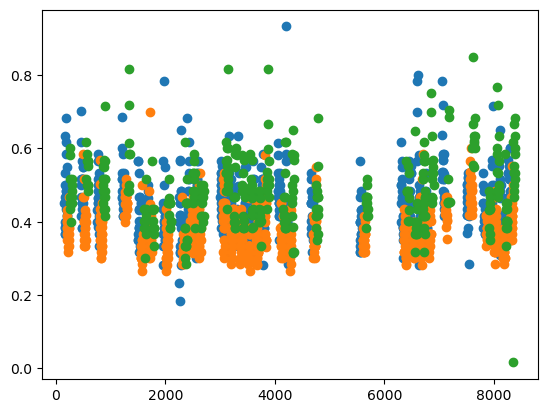

In [12]:
plt.scatter(rt_df_C1.index,rt_df_C1)
plt.scatter(rt_df_C2.index,rt_df_C2)
plt.scatter(rt_df_C3.index,rt_df_C3)

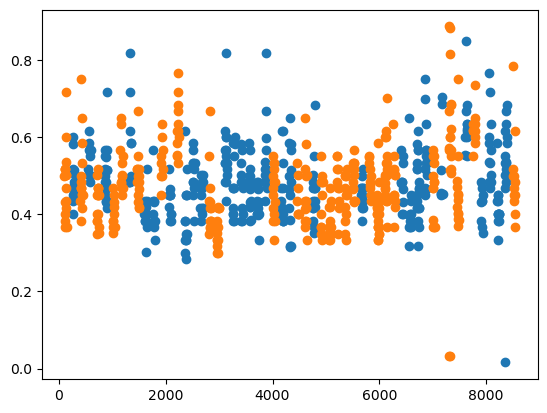

In [13]:
plt.scatter(rt_df_C3.index,rt_df_C3)
plt.scatter(rt_df_N3.index,rt_df_N3)

In [19]:
df_C3[df_C3['correct']==0]


,subid,etapa,ntrial,estim,correct,response_time,cumulative_response_time,fixation_onset,fixation_dur,stim_onset,stim_dur,A,B
252,C029,3,3,r7,0,NaN,NaN,0,12,15,55,71,100
253,C029,3,4,r4,0,0.517,118.152,0,12,15,44,60,50
254,C029,3,5,r6,0,NaN,NaN,0,12,15,56,72,50
255,C029,3,6,r6,0,NaN,NaN,0,12,15,62,78,100
257,C029,3,8,r3,0,0.450,122.551,0,12,15,62,78,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7937,C33,3,38,r4,0,0.450,153.568,0,12,15,29,45,100
8067,C31,3,18,g6,0,0.534,151.063,0,12,15,60,76,50
8084,C31,3,35,r6,0,NaN,NaN,0,12,15,36,52,50
8352,C32,3,3,r8,0,NaN,NaN,0,12,15,42,58,100


In [21]:
df_N3[df_N3['correct']==0]
print(df_N3[df_N3['correct']==0])

     subid  etapa  ntrial estim  correct  response_time  \
106   N030      3       7    g8        0          0.518   
120   N030      3      21    g7        0          0.384   
121   N030      3      22    g6        0          0.717   
428   N046      3      29    r3        0          0.417   
445   N046      3      46    r4        0          0.450   
716   N032      3      17    g6        0          0.384   
1159  N036      3      10    g1        0            NaN   
1174  N036      3      25    g4        0            NaN   
1175  N036      3      26    g3        0            NaN   
1190  N036      3      41    g3        0            NaN   
1195  N036      3      46    g3        0            NaN   
1495  N018      3      46    g8        0          0.466   
2223  N028      3      24    g1        0            NaN   
2245  N028      3      46    g3        0            NaN   
2826   N02      3      27    g4        0            NaN   
2961  N012      3      12    g8        0          0.351 